<a href="https://colab.research.google.com/github/Uday615/uday/blob/main/SocialNetworkAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing  required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Loading  datasets
dataset=pd.read_csv("/content/Social_Network_Ads.csv")

In [7]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


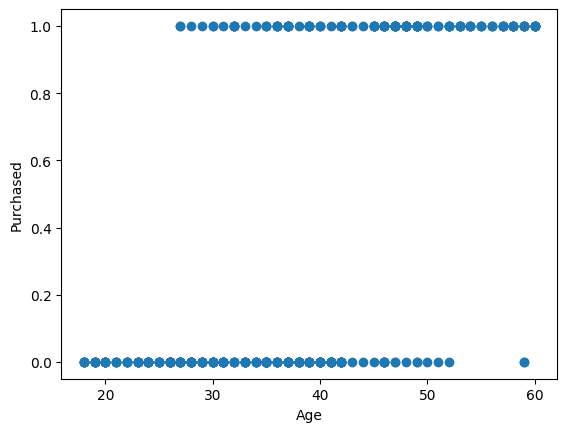

In [8]:
plt.scatter(dataset["Age"],dataset["Purchased"])
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.show()

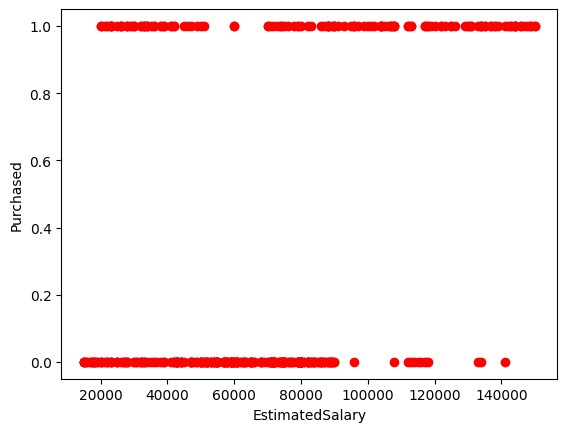

In [9]:
plt.scatter(dataset["EstimatedSalary"],dataset["Purchased"],color='red')
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.show()

In [10]:
#Extracting Independent features(Age,EstimatedSalary) from dataset
X= dataset.iloc[:, [2,3]].values

In [11]:
X.shape

(400, 2)

In [12]:
#Extracting dependent(Purchased) from dataset
y= dataset.iloc[:, 4].values

In [13]:
y.shape

(400,)

In [14]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=40)

In [15]:
X_train.shape

(320, 2)

In [16]:
y_train.shape

(320,)

In [17]:
X_test.shape

(80, 2)

In [18]:
y_test.shape

(80,)

In [19]:
    # Scaling  Z
    from sklearn.preprocessing import StandardScaler
    st_x= StandardScaler()
    X_train= st_x.fit_transform(X_train)
    X_test= st_x.transform(X_test)

In [20]:
X_train

array([[-0.70562757,  1.36559977],
       [-0.70562757, -0.07833337],
       [ 0.26472405,  0.00830262],
       [ 1.91432181, -1.3778732 ],
       [-0.22045176,  2.116445  ],
       [ 0.94397019,  1.94317303],
       [-0.1234166 ,  0.18157459],
       [ 0.16768889,  0.21045326],
       [-1.87004951, -1.49338785],
       [ 0.94397019, -1.17572256],
       [ 0.94397019,  2.02980902],
       [ 0.36175921,  1.07681314],
       [-0.31748692, -0.39599866],
       [ 0.94397019,  1.39447843],
       [ 0.6528647 , -1.40675186],
       [ 0.84693502, -1.17572256],
       [-0.51155725, -0.80029994],
       [-0.89969789,  0.12381727],
       [-1.19080338,  0.38372523],
       [ 1.13804051, -1.00245058],
       [-0.99673306, -1.11796524],
       [ 1.23507567, -1.3778732 ],
       [ 0.74989986,  1.33672111],
       [ 1.52618116,  1.07681314],
       [-0.1234166 , -0.02057605],
       [-0.41452208,  0.03718128],
       [ 1.33211083, -0.94469326],
       [ 1.91432181,  0.8746625 ],
       [-0.70562757,

In [21]:
    #Load Logistic Regression model
    from sklearn.linear_model import LogisticRegression

In [22]:
# Logistic Regression to the training set

model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
#Predicting the test set result
y_pred= model.predict(X_test)

In [24]:
#Test Accuracy of the result
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[54,  2],
       [11, 13]])

In [26]:
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [27]:
print("Model accuracy is",(accuracy*100),"%")

Model accuracy is 83.75 %


<ipython-input-28-3c50a6be1b58>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


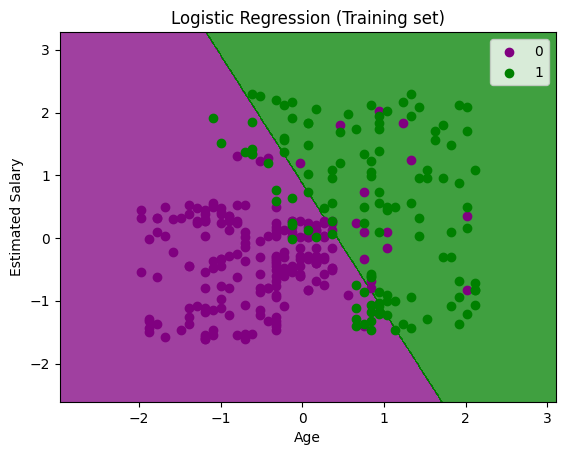

In [28]:
    #Visualizing the training set result
    from matplotlib.colors import ListedColormap
    x_set, y_set = X_train, y_train
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('purple','green' )))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            c = ListedColormap(('purple', 'green'))(i), label = j)
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

<ipython-input-29-8666d2f49f0a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


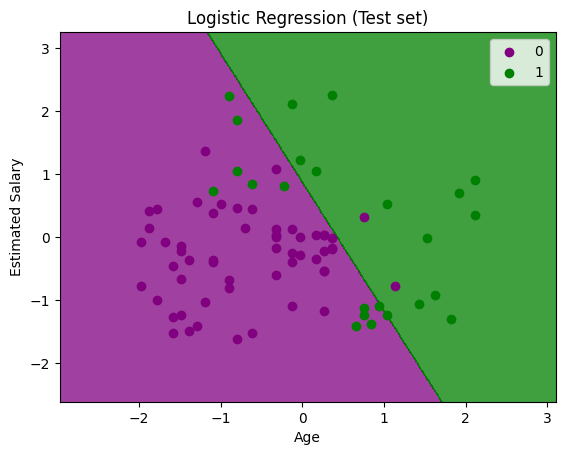

In [29]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()